<a href="https://colab.research.google.com/github/maxenlee/Deep-Dive/blob/main/Maxen%7CProject_4_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title

## Problem Definition


State the business problem. Translate the business problem into a Data Science problem by stating what kind of problem it is ( supervised vs unsupervised ) and whether it is a classification, regression, or clustering problem.

## Data Collection/Sources


In [ ]:
!pip install scikit-learn==1.4

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import regex as re
import seaborn as sns

In [ ]:
url = "https://ddc-datascience.s3.amazonaws.com/Projects/Project.4-Spotify/Data/Spotify.csv"
#!curl -s -I {url}

In [ ]:
df = pd.read_csv(url)
df.head(1)

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B


Keeping only features that have the relevance to the moment a song is dropped

In [ ]:
df_mvp = df.drop(columns= ['Index',	'Highest Charting Position','Song ID',	'Number of Times Charted',	'Week of Highest Charting',	'Song Name','Artist','Genre','Weeks Charted', 'Popularity'])
df_mvp

,Streams,Artist Followers,Release Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,"48,633,449",3377762,2017-12-08,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,"47,248,719",2230022,2021-07-09,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,"40,162,559",6266514,2021-05-21,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,"37,799,456",83293380,2021-06-25,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,"33,948,454",5473565,2021-07-23,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,"4,630,675",27167675,2017-06-02,0.762,0.7,-6.021,0.0694,0.00261,0.153,116.073,209320,0.608,A
1552,"4,623,030",15019109,2019-10-11,0.528,0.87,-3.123,0.0851,0.24,0.333,152.37,181930,0.714,B
1553,"4,620,876",22698747,2018-01-12,0.765,0.523,-4.333,0.03,0.184,0.132,104.988,217307,0.394,D
1554,"4,607,385",208630,2019-09-25,0.832,0.55,-7.026,0.0587,0.249,0.182,154.064,152784,0.881,F


Now that columns are dropped. Look for nulls and duplicates

In [ ]:
# prompt: i want to know if a column contains and blank values

df_mvp.isnull().sum()


Streams             0
Artist Followers    0
Release Date        0
Danceability        0
Energy              0
Loudness            0
Speechiness         0
Acousticness        0
Liveness            0
Tempo               0
Duration (ms)       0
Valence             0
Chord               0
dtype: int64

In [ ]:
blanks = []
for i, row in df_mvp.iterrows():
  for col in df_mvp.columns:
    if row[col] == ' ':
      blanks.append((i))

df_mvp_trimmed = df_mvp.drop(set(blanks))


In [ ]:
blanks2 = []
for i, row in df_mvp_trimmed.iterrows():
  for col in df_mvp_trimmed.columns:
    if row[col] == ' ':
      blanks.append((i))

set(blanks2)


set()

No Blank elements

In [ ]:
# prompt: df_mvp_trimmed change dtypes

df_mvp_trimmed = df_mvp_trimmed.astype({
    'Release Date':'object',
    'Artist Followers': 'int64',
    'Danceability':'float64',
    'Energy':'float64',
    'Loudness':'float64',
    'Speechiness':'float64',
    'Acousticness':'float64',
    'Liveness':'float64',
    'Tempo':'float64',
    'Duration (ms)':'float64',
    'Valence':'float64'
})
df_mvp_trimmed.dtypes


Streams              object
Artist Followers      int64
Release Date         object
Danceability        float64
Energy              float64
Loudness            float64
Speechiness         float64
Acousticness        float64
Liveness            float64
Tempo               float64
Duration (ms)       float64
Valence             float64
Chord                object
dtype: object

In [ ]:
# prompt: change df_mvp_trimmed['Streams'] dtype to int. it has commas

df_mvp_trimmed['Streams'] = df_mvp_trimmed['Streams'].str.replace(',', '').astype(int)


In [ ]:
df_mvp_trimmed.min()

Streams                4176083
Artist Followers          4883
Release Date        1942-01-01
Danceability              0.15
Energy                   0.054
Loudness               -25.166
Speechiness             0.0232
Acousticness          0.000025
Liveness                0.0197
Tempo                   46.718
Duration (ms)          30133.0
Valence                  0.032
Chord                        A
dtype: object

In [ ]:
df_mvp_trimmed.max()

Streams               48633449
Artist Followers      83337783
Release Date        2021-08-13
Danceability              0.98
Energy                    0.97
Loudness                 1.509
Speechiness              0.884
Acousticness             0.994
Liveness                 0.962
Tempo                  205.272
Duration (ms)         588139.0
Valence                  0.979
Chord                    G#/Ab
dtype: object

In [ ]:
df_mvp_trimmed.dtypes

Streams               int64
Artist Followers      int64
Release Date         object
Danceability        float64
Energy              float64
Loudness            float64
Speechiness         float64
Acousticness        float64
Liveness            float64
Tempo               float64
Duration (ms)       float64
Valence             float64
Chord                object
dtype: object

I need to address the release date and cord.
I want to one hot encode release date my quarter and by year
I want to one hot encode chord as well

In [ ]:
# prompt: df_mvp_trimmed I need to address the release date and cord. I want to one hot encode release date my quarter and by year I want to one hot encode chord as well

import pandas as pd
# Release Date
df_mvp_trimmed['Release Date'] = pd.to_datetime(df_mvp_trimmed['Release Date'])
df_mvp_trimmed['Release Quarter'] = df_mvp_trimmed['Release Date'].dt.quarter
df_mvp_trimmed['Release Year'] = df_mvp_trimmed['Release Date'].dt.year

# One-hot encode the release quarter and year
df_mvp_trimmed = pd.get_dummies(df_mvp_trimmed, columns=['Release Quarter', 'Release Year'])

# Chord
df_mvp_trimmed = pd.get_dummies(df_mvp_trimmed, columns=['Chord'])


In [ ]:
df_mvp_trimmed.drop(columns=['Release Date'], inplace = True)

In [ ]:
df_mvp_trimmed.dtypes

Streams               int64
Artist Followers      int64
Danceability        float64
Energy              float64
Loudness            float64
                     ...   
Chord_E               uint8
Chord_F               uint8
Chord_F#/Gb           uint8
Chord_G               uint8
Chord_G#/Ab           uint8
Length: 72, dtype: object

## EDA

In [ ]:
df_mvp_trimmed.columns

Index(['Streams', 'Artist Followers', 'Danceability', 'Energy', 'Loudness',
       'Speechiness', 'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)',
       'Valence', 'Release Quarter_1', 'Release Quarter_2',
       'Release Quarter_3', 'Release Quarter_4', 'Release Year_1942',
       'Release Year_1957', 'Release Year_1959', 'Release Year_1962',
       'Release Year_1963', 'Release Year_1964', 'Release Year_1965',
       'Release Year_1970', 'Release Year_1973', 'Release Year_1975',
       'Release Year_1977', 'Release Year_1978', 'Release Year_1979',
       'Release Year_1980', 'Release Year_1981', 'Release Year_1983',
       'Release Year_1984', 'Release Year_1985', 'Release Year_1988',
       'Release Year_1990', 'Release Year_1991', 'Release Year_1994',
       'Release Year_1995', 'Release Year_1998', 'Release Year_1999',
       'Release Year_2000', 'Release Year_2002', 'Release Year_2004',
       'Release Year_2005', 'Release Year_2006', 'Release Year_2007',
       'Release Ye

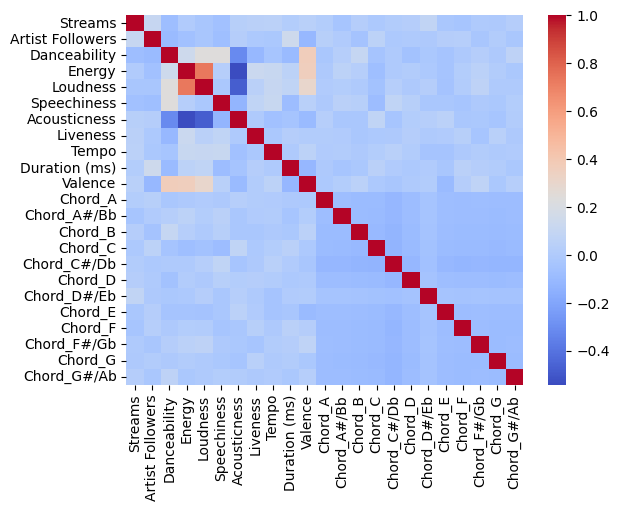

In [ ]:
# prompt: correlation matrix for df_mvp heatmap

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = df_mvp_trimmed.drop(columns = ['Release Quarter_1', 'Release Quarter_2',
       'Release Quarter_3', 'Release Quarter_4', 'Release Year_1942',
       'Release Year_1957', 'Release Year_1959', 'Release Year_1962',
       'Release Year_1963', 'Release Year_1964', 'Release Year_1965',
       'Release Year_1970', 'Release Year_1973', 'Release Year_1975',
       'Release Year_1977', 'Release Year_1978', 'Release Year_1979',
       'Release Year_1980', 'Release Year_1981', 'Release Year_1983',
       'Release Year_1984', 'Release Year_1985', 'Release Year_1988',
       'Release Year_1990', 'Release Year_1991', 'Release Year_1994',
       'Release Year_1995', 'Release Year_1998', 'Release Year_1999',
       'Release Year_2000', 'Release Year_2002', 'Release Year_2004',
       'Release Year_2005', 'Release Year_2006', 'Release Year_2007',
       'Release Year_2008', 'Release Year_2009', 'Release Year_2010',
       'Release Year_2011', 'Release Year_2012', 'Release Year_2013',
       'Release Year_2014', 'Release Year_2015', 'Release Year_2016',
       'Release Year_2017', 'Release Year_2018', 'Release Year_2019',
       'Release Year_2020', 'Release Year_2021',]).corr()

# Create a heatmap
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')

# Display the heatmap
plt.show()


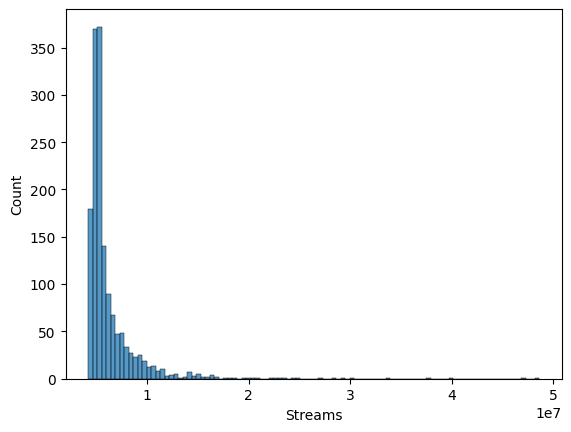

In [ ]:
# prompt: hist of stramd

import matplotlib.pyplot as plt
sns.histplot(df_mvp_trimmed['Streams'], bins=100)
plt.show()


I think I am ready to run a model.


Mean RMSE: 3466427.808041414


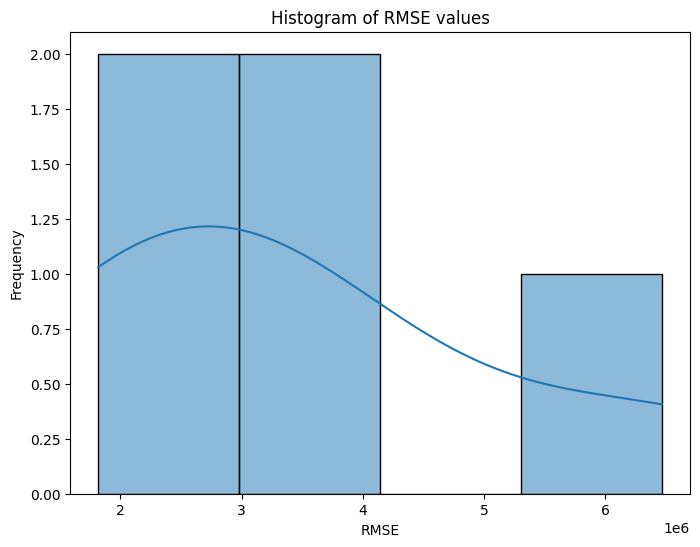

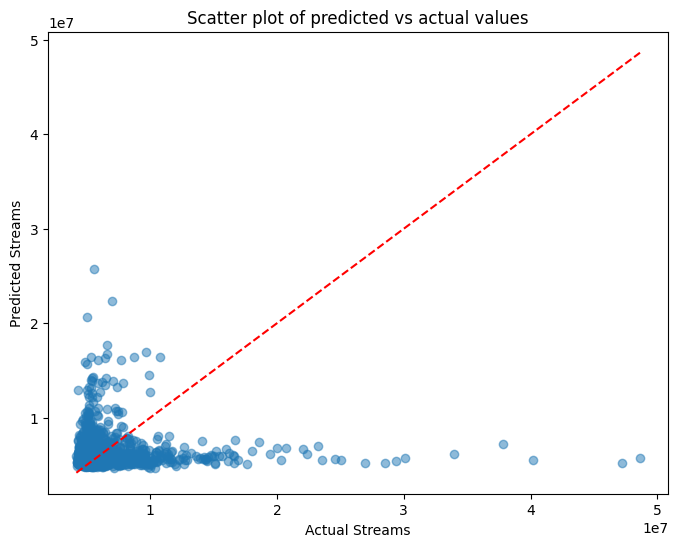

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_mvp_trimmed is your DataFrame and is already defined

# Create a random forest regressor
rf = RandomForestRegressor(n_estimators=100)

# Perform cross-validation and calculate RMSE
cv_scores = cross_val_score(rf, df_mvp_trimmed.drop('Streams', axis=1), df_mvp_trimmed['Streams'], cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-cv_scores)

# Print the mean RMSE
print("Mean RMSE:", rmse_scores.mean())

# Plot the histogram of the RMSE values
plt.figure(figsize=(8, 6))
sns.histplot(rmse_scores, kde=True)
plt.xlabel("RMSE")
plt.ylabel("Frequency")
plt.title("Histogram of RMSE values")
plt.show()

# Get the cross-validated predictions for the entire dataset
y_pred = cross_val_predict(rf, df_mvp_trimmed.drop('Streams', axis=1), df_mvp_trimmed['Streams'], cv=5)

# Plot the scatter plot of predicted vs actual values for the entire dataset
plt.figure(figsize=(8, 6))
plt.scatter(df_mvp_trimmed['Streams'], y_pred, alpha=0.5)
plt.plot([df_mvp_trimmed['Streams'].min(), df_mvp_trimmed['Streams'].max()], [df_mvp_trimmed['Streams'].min(), df_mvp_trimmed['Streams'].max()], 'r--')  # Add a reference line
plt.xlabel("Actual Streams")
plt.ylabel("Predicted Streams")
plt.title("Scatter plot of predicted vs actual values")
plt.show()


### Scaling the target with log1p

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming df_mvp_trimmed is your DataFrame and is already defined

# Step 1: Log-transform the 'Streams' column
df_mvp_trimmed['Log_Streams'] = np.log1p(df_mvp_trimmed['Streams'])

# Step 2: Split the dataset into features and transformed target
X = df_mvp_trimmed.drop(['Streams', 'Log_Streams'], axis=1)  # drop the original 'Streams' column
y = df_mvp_trimmed['Log_Streams']

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create and train the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Step 5: Evaluate the model using cross-validation
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-cv_scores)
print("Mean RMSE (log scale):", rmse_scores.mean())

# Step 6: Generate predictions on the test set and inverse-transform these predictions
y_pred_log_scale = rf.predict(X_test)
y_pred = np.expm1(y_pred_log_scale)  # Inverse-log-transform predictions

# Step 7: Calculate the RMSE on the test set using the actual 'Streams' values
y_test_actual = np.expm1(y_test)  # Inverse-log-transform the actual log-transformed 'Streams' values
rmse_test = np.sqrt(mean_squared_error(y_test_actual, y_pred))
print("Test RMSE (original scale):", rmse_test)


Mean RMSE (log scale): 0.3035433165233777
Test RMSE (original scale): 2633092.6592519716


# Feature Selection
Asking a business question
If i am making a song. How many streams is it going to get based on the amount of songs released in the past 5 years.
I want to remove songs that are outliers. Basically one-hit wonders.

In [ ]:
df_5_years = df_mvp_trimmed.drop(columns = [ 'Release Year_1942',
       'Release Year_1957', 'Release Year_1959', 'Release Year_1962',
       'Release Year_1963', 'Release Year_1964', 'Release Year_1965',
       'Release Year_1970', 'Release Year_1973', 'Release Year_1975',
       'Release Year_1977', 'Release Year_1978', 'Release Year_1979',
       'Release Year_1980', 'Release Year_1981', 'Release Year_1983',
       'Release Year_1984', 'Release Year_1985', 'Release Year_1988',
       'Release Year_1990', 'Release Year_1991', 'Release Year_1994',
       'Release Year_1995', 'Release Year_1998', 'Release Year_1999',
       'Release Year_2000', 'Release Year_2002', 'Release Year_2004',
       'Release Year_2005', 'Release Year_2006', 'Release Year_2007',
       'Release Year_2008', 'Release Year_2009', 'Release Year_2010',
       'Release Year_2011', 'Release Year_2012', 'Release Year_2013',
       'Release Year_2014','Log_Streams'])

In [ ]:
df_5_years

,Streams,Artist Followers,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),...,Chord_B,Chord_C,Chord_C#/Db,Chord_D,Chord_D#/Eb,Chord_E,Chord_F,Chord_F#/Gb,Chord_G,Chord_G#/Ab
0,48633449,3377762,0.714,0.800,-4.808,0.0504,0.12700,0.3590,134.002,211560.0,...,1,0,0,0,0,0,0,0,0,0
1,47248719,2230022,0.591,0.764,-5.484,0.0483,0.03830,0.1030,169.928,141806.0,...,0,0,1,0,0,0,0,0,0,0
2,40162559,6266514,0.563,0.664,-5.044,0.1540,0.33500,0.0849,166.928,178147.0,...,0,0,0,0,0,0,0,0,0,0
3,37799456,83293380,0.808,0.897,-3.712,0.0348,0.04690,0.3640,126.026,231041.0,...,1,0,0,0,0,0,0,0,0,0
4,33948454,5473565,0.736,0.704,-7.409,0.0615,0.02030,0.0501,149.995,212000.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,4630675,27167675,0.762,0.700,-6.021,0.0694,0.00261,0.1530,116.073,209320.0,...,0,0,0,0,0,0,0,0,0,0
1552,4623030,15019109,0.528,0.870,-3.123,0.0851,0.24000,0.3330,152.370,181930.0,...,1,0,0,0,0,0,0,0,0,0
1553,4620876,22698747,0.765,0.523,-4.333,0.0300,0.18400,0.1320,104.988,217307.0,...,0,0,0,1,0,0,0,0,0,0
1554,4607385,208630,0.832,0.550,-7.026,0.0587,0.24900,0.1820,154.064,152784.0,...,0,0,0,0,0,0,1,0,0,0


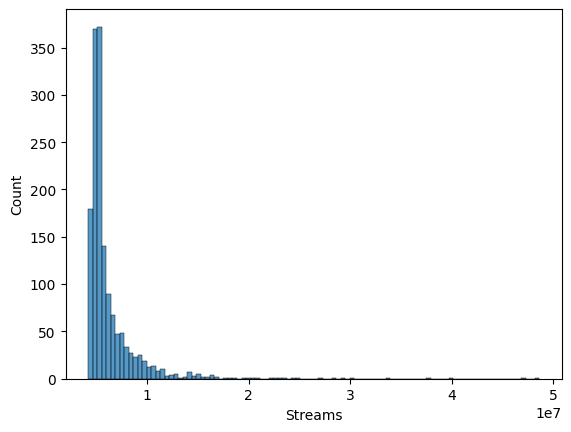

In [ ]:
# prompt: hist of stramd

import matplotlib.pyplot as plt
sns.histplot(df_5_years['Streams'], bins=100)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming df_mvp_trimmed is your DataFrame and is already defined

# Step 1: Log-transform the 'Streams' column
df_5_years['Log_Streams'] = np.log1p(df_5_years['Streams'])

# Step 2: Split the dataset into features and transformed target
X = df_5_years.drop(['Streams', 'Log_Streams'], axis=1)  # drop the original 'Streams' column
y = df_5_years['Log_Streams']

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create and train the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Step 5: Evaluate the model using cross-validation
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-cv_scores)
print("Mean RMSE (log scale):", rmse_scores.mean())

# Step 6: Generate predictions on the test set and inverse-transform these predictions
y_pred_log_scale = rf.predict(X_test)
y_pred = np.expm1(y_pred_log_scale)  # Inverse-log-transform predictions

# Step 7: Calculate the RMSE on the test set using the actual 'Streams' values
y_test_actual = np.expm1(y_test)  # Inverse-log-transform the actual log-transformed 'Streams' values
rmse_test = np.sqrt(mean_squared_error(y_test_actual, y_pred))
print("Test RMSE (original scale):", rmse_test)


Mean RMSE (log scale): 0.30280345719373947
Test RMSE (original scale): 2633988.3917194866


In [ ]:
print(df_5_years['Streams'].min(),df_5_years['Streams'].median(),df_5_years['Streams'].max())

4176083 5269163.0 48633449


In [ ]:
df_over25 = df_5_years[df_5_years['Streams'] < 10_000_000]

Trimming off the highest rated

In [ ]:
df_over25

,Streams,Artist Followers,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),...,Chord_C,Chord_C#/Db,Chord_D,Chord_D#/Eb,Chord_E,Chord_F,Chord_F#/Gb,Chord_G,Chord_G#/Ab,Log_Streams
49,9841998,389076,0.855,0.463,-7.454,0.0367,0.21700,0.3470,102.931,122773.0,...,0,0,0,1,0,0,0,0,0,16.102169
50,9799701,3126961,0.627,0.849,-3.167,0.1530,0.09130,0.1450,89.907,158087.0,...,0,1,0,0,0,0,0,0,0,16.097863
51,9781153,45362,0.750,0.522,-7.018,0.0293,0.28200,0.0743,110.427,321556.0,...,0,0,0,0,0,0,0,0,0,16.095968
52,9635619,47014200,0.765,0.373,-9.921,0.0713,0.34100,0.1120,85.016,195777.0,...,0,0,0,0,0,0,0,0,1,16.080977
53,9600707,32178,0.830,0.839,-6.985,0.0699,0.00201,0.0353,128.012,345543.0,...,0,0,0,0,0,0,1,0,0,16.077347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,4630675,27167675,0.762,0.700,-6.021,0.0694,0.00261,0.1530,116.073,209320.0,...,0,0,0,0,0,0,0,0,0,15.348213
1552,4623030,15019109,0.528,0.870,-3.123,0.0851,0.24000,0.3330,152.370,181930.0,...,0,0,0,0,0,0,0,0,0,15.346561
1553,4620876,22698747,0.765,0.523,-4.333,0.0300,0.18400,0.1320,104.988,217307.0,...,0,0,1,0,0,0,0,0,0,15.346095
1554,4607385,208630,0.832,0.550,-7.026,0.0587,0.24900,0.1820,154.064,152784.0,...,0,0,0,0,0,1,0,0,0,15.343171


Mean RMSE: 1267856.1576362187


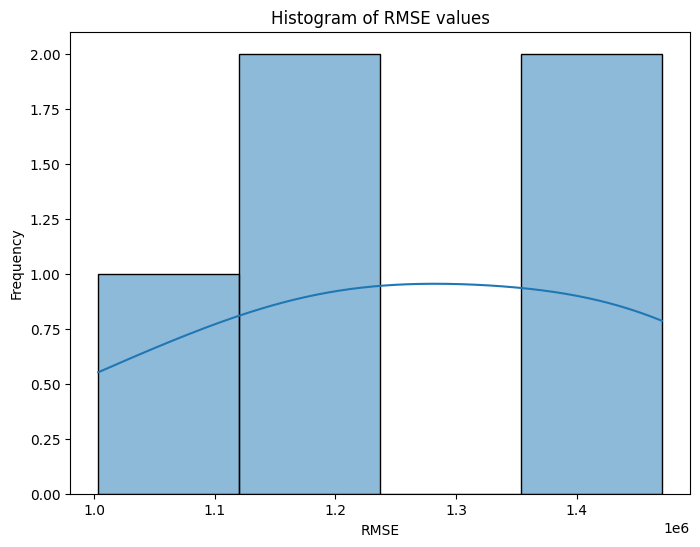

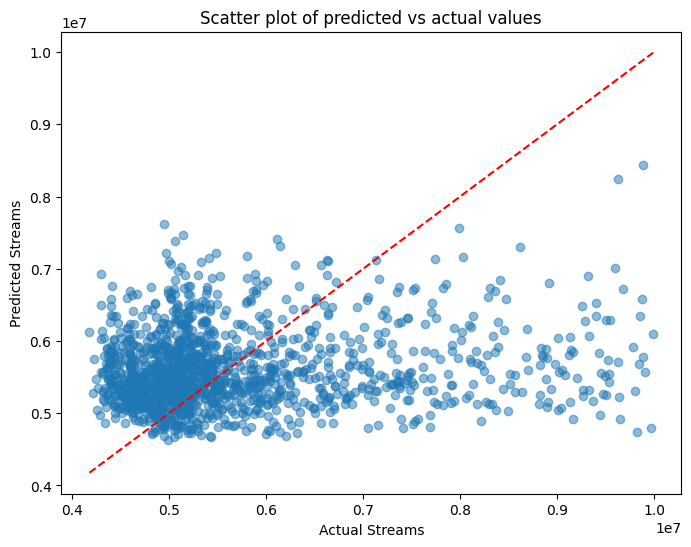

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_mvp_trimmed is your DataFrame and is already defined
df_mvp_trimmed = df_over25.drop(columns = ['Log_Streams'])
# Create a random forest regressor
rf = RandomForestRegressor(n_estimators=100)

# Perform cross-validation and calculate RMSE
cv_scores = cross_val_score(rf, df_mvp_trimmed.drop('Streams', axis=1), df_mvp_trimmed['Streams'], cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-cv_scores)

# Print the mean RMSE
print("Mean RMSE:", rmse_scores.mean())

# Plot the histogram of the RMSE values
plt.figure(figsize=(8, 6))
sns.histplot(rmse_scores, kde=True)
plt.xlabel("RMSE")
plt.ylabel("Frequency")
plt.title("Histogram of RMSE values")
plt.show()

# Get the cross-validated predictions for the entire dataset
y_pred = cross_val_predict(rf, df_mvp_trimmed.drop('Streams', axis=1), df_mvp_trimmed['Streams'], cv=5)

# Plot the scatter plot of predicted vs actual values for the entire dataset
plt.figure(figsize=(8, 6))
plt.scatter(df_mvp_trimmed['Streams'], y_pred, alpha=0.5)
plt.plot([df_mvp_trimmed['Streams'].min(), df_mvp_trimmed['Streams'].max()], [df_mvp_trimmed['Streams'].min(), df_mvp_trimmed['Streams'].max()], 'r--')  # Add a reference line
plt.xlabel("Actual Streams")
plt.ylabel("Predicted Streams")
plt.title("Scatter plot of predicted vs actual values")
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming df_mvp_trimmed is your DataFrame and is already defined

# Step 1: Log-transform the 'Streams' column
df_over25['Log_Streams'] = np.log1p(df_over25['Streams'])

# Step 2: Split the dataset into features and transformed target
X = df_over25.drop(['Streams', 'Log_Streams'], axis=1)  # drop the original 'Streams' column
y = df_over25['Log_Streams']

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create and train the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Step 5: Evaluate the model using cross-validation
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-cv_scores)
print("Mean RMSE (log scale):", rmse_scores.mean())

# Step 6: Generate predictions on the test set and inverse-transform these predictions
y_pred_log_scale = rf.predict(X_test)
y_pred = np.expm1(y_pred_log_scale)  # Inverse-log-transform predictions

# Step 7: Calculate the RMSE on the test set using the actual 'Streams' values
y_test_actual = np.expm1(y_test)  # Inverse-log-transform the actual log-transformed 'Streams' values
rmse_test = np.sqrt(mean_squared_error(y_test_actual, y_pred))
print("Test RMSE (original scale):", rmse_test)


<ipython-input-359-37b5025eca92>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_over25['Log_Streams'] = np.log1p(df_over25['Streams'])


Mean RMSE (log scale): 0.1806687051042472
Test RMSE (original scale): 1215561.7300323176


## Adding more features

In [ ]:
df_genres = df.drop(columns= ['Index','Highest Charting Position','Song ID',	'Number of Times Charted',	'Week of Highest Charting',	'Song Name', 'Popularity'])
df_genres.head(1)


,Streams,Artist,Artist Followers,Genre,Release Date,Weeks Charted,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,"48,633,449",Måneskin,3377762,"['indie rock italiano', 'italian pop']",2017-12-08,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B


In [ ]:
len(df_genres.columns)

16

In [ ]:
# prompt: df_genres change dtypes
blanks = []
for i, row in df_genres.iterrows():
  for col in df_genres.columns:
    if row[col] == ' ':
      blanks.append((i))

df_genres = df_genres.drop(set(blanks))


In [ ]:
from datetime import datetime, timedelta

def parse_weeks(weeks_str):
    weeks_list = weeks_str.split('\n')
    parsed_weeks = []
    for week in weeks_list:
        start_date, end_date = week.split('--')
        start_date = pd.to_datetime(start_date)
        end_date = pd.to_datetime(end_date)
        parsed_weeks.append(start_date)
        parsed_weeks.append(end_date)
    return parsed_weeks

df_genres['Parsed Weeks'] = df_genres['Weeks Charted'].apply(parse_weeks)

In [ ]:
df_genres['Parsed Weeks']

0       [2021-07-23 00:00:00, 2021-07-30 00:00:00, 202...
1       [2021-07-23 00:00:00, 2021-07-30 00:00:00, 202...
2       [2021-07-23 00:00:00, 2021-07-30 00:00:00, 202...
3       [2021-07-23 00:00:00, 2021-07-30 00:00:00, 202...
4              [2021-07-23 00:00:00, 2021-07-30 00:00:00]
                              ...                        
1551           [2019-12-27 00:00:00, 2020-01-03 00:00:00]
1552           [2019-12-27 00:00:00, 2020-01-03 00:00:00]
1553           [2019-12-27 00:00:00, 2020-01-03 00:00:00]
1554           [2019-12-27 00:00:00, 2020-01-03 00:00:00]
1555           [2019-12-27 00:00:00, 2020-01-03 00:00:00]
Name: Parsed Weeks, Length: 1545, dtype: object

In [ ]:
df_genres['first_week_charted'] = df_genres['Parsed Weeks'].apply(min)

In [ ]:
df_genres['Parsed Weeks'][2]

[Timestamp('2021-07-23 00:00:00'),
 Timestamp('2021-07-30 00:00:00'),
 Timestamp('2021-07-16 00:00:00'),
 Timestamp('2021-07-23 00:00:00'),
 Timestamp('2021-07-09 00:00:00'),
 Timestamp('2021-07-16 00:00:00'),
 Timestamp('2021-07-02 00:00:00'),
 Timestamp('2021-07-09 00:00:00'),
 Timestamp('2021-06-25 00:00:00'),
 Timestamp('2021-07-02 00:00:00'),
 Timestamp('2021-06-18 00:00:00'),
 Timestamp('2021-06-25 00:00:00'),
 Timestamp('2021-06-11 00:00:00'),
 Timestamp('2021-06-18 00:00:00'),
 Timestamp('2021-06-04 00:00:00'),
 Timestamp('2021-06-11 00:00:00'),
 Timestamp('2021-05-28 00:00:00'),
 Timestamp('2021-06-04 00:00:00'),
 Timestamp('2021-05-21 00:00:00'),
 Timestamp('2021-05-28 00:00:00'),
 Timestamp('2021-05-14 00:00:00'),
 Timestamp('2021-05-21 00:00:00')]

In [ ]:
df_genres.iloc[2]

Streams                                                      40,162,559
Artist                                                   Olivia Rodrigo
Artist Followers                                                6266514
Genre                                                           ['pop']
Release Date                                                 2021-05-21
Weeks Charted         2021-07-23--2021-07-30\n2021-07-16--2021-07-23...
Danceability                                                      0.563
Energy                                                            0.664
Loudness                                                         -5.044
Speechiness                                                       0.154
Acousticness                                                      0.335
Liveness                                                         0.0849
Tempo                                                           166.928
Duration (ms)                                                   

In [ ]:
df_genres['Parsed Weeks'][3][0].date()

datetime.date(2021, 7, 23)

In [ ]:
df_genres['first_week_charted']

0      2021-06-04
1      2021-07-09
2      2021-05-14
3      2021-06-25
4      2021-07-23
          ...    
1551   2019-12-27
1552   2019-12-27
1553   2019-12-27
1554   2019-12-27
1555   2019-12-27
Name: first_week_charted, Length: 1545, dtype: datetime64[ns]

In [ ]:
df_genres['Release Date'] = pd.to_datetime(df_genres['Release Date'])
df_genres['first_week_charted'] = pd.to_datetime(df_genres['first_week_charted'])

In [ ]:
type(df_genres['Release Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
start_date =  df_genres['Release Date']
end_date = df_genres['first_week_charted']

In [ ]:
start_date

0      2017-12-08
1      2021-07-09
2      2021-05-21
3      2021-06-25
4      2021-07-23
          ...    
1551   2017-06-02
1552   2019-10-11
1553   2018-01-12
1554   2019-09-25
1555   2019-11-13
Name: Release Date, Length: 1545, dtype: datetime64[ns]

In [ ]:
end_date

0      2021-06-04
1      2021-07-09
2      2021-05-14
3      2021-06-25
4      2021-07-23
          ...    
1551   2019-12-27
1552   2019-12-27
1553   2019-12-27
1554   2019-12-27
1555   2019-12-27
Name: first_week_charted, Length: 1545, dtype: datetime64[ns]

In [ ]:
df_genres['days_to_chart'] = end_date - start_date

In [ ]:
df_genres['days_to_chart']

0      1274 days
1         0 days
2        -7 days
3         0 days
4         0 days
          ...   
1551    938 days
1552     77 days
1553    714 days
1554     93 days
1555     44 days
Name: days_to_chart, Length: 1545, dtype: timedelta64[ns]

In [ ]:
df_genres.head()

,Streams,Artist,Artist Followers,Genre,Release Date,Weeks Charted,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord,Parsed Weeks,first_week_charted,days_to_chart
0,"48,633,449",Måneskin,3377762,"['indie rock italiano', 'italian pop']",2017-12-08,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B,"[2021-07-23 00:00:00, 2021-07-30 00:00:00, 202...",2021-06-04,1274 days
1,"47,248,719",The Kid LAROI,2230022,['australian hip hop'],2021-07-09,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db,"[2021-07-23 00:00:00, 2021-07-30 00:00:00, 202...",2021-07-09,0 days
2,"40,162,559",Olivia Rodrigo,6266514,['pop'],2021-05-21,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A,"[2021-07-23 00:00:00, 2021-07-30 00:00:00, 202...",2021-05-14,-7 days
3,"37,799,456",Ed Sheeran,83293380,"['pop', 'uk pop']",2021-06-25,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B,"[2021-07-23 00:00:00, 2021-07-30 00:00:00, 202...",2021-06-25,0 days
4,"33,948,454",Lil Nas X,5473565,"['lgbtq+ hip hop', 'pop rap']",2021-07-23,2021-07-23--2021-07-30,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb,"[2021-07-23 00:00:00, 2021-07-30 00:00:00]",2021-07-23,0 days


### Dropping base date columns

In [ ]:
df_genres.drop(columns = ['first_week_charted','Parsed Weeks','Weeks Charted'], inplace = True)

In [ ]:
df_genres = df_genres.astype({
    'Release Date':'object',
    'Artist Followers': 'int64',
    'Danceability':'float64',
    'Energy':'float64',
    'Loudness':'float64',
    'Speechiness':'float64',
    'Acousticness':'float64',
    'Liveness':'float64',
    'Tempo':'float64',
    'Duration (ms)':'float64',
    'Valence':'float64',
    'days_to_chart': 'int'
})
df_genres.head(1)
# prompt: df_genres I need to address the release date and cord. I want to one hot encode release date my quarter and by year I want to one hot encode chord as well
# prompt: change df_genres['Streams'] dtype to int. it has commas


,Streams,Artist,Artist Followers,Genre,Release Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord,days_to_chart
0,"48,633,449",Måneskin,3377762,"['indie rock italiano', 'italian pop']",2017-12-08 00:00:00,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560.0,0.589,B,110073600000000000


In [ ]:

df_genres['Streams'] = df_genres['Streams'].str.replace(',', '').astype(int)

import pandas as pd
# Release Date
df_genres['Release Date'] = pd.to_datetime(df_genres['Release Date'])
df_genres['Release Quarter'] = df_genres['Release Date'].dt.quarter
df_genres['Release Year'] = df_genres['Release Date'].dt.year

# One-hot encode the release quarter and year
dummy1 = pd.get_dummies(df_genres, columns=['Release Quarter', 'Release Year'])

# Chord
dummy2 = pd.get_dummies(df_genres, columns=['Chord'])
df_genres.drop(columns=['Release Date','Chord'], inplace = True)

df_genres.dtypes
[]

[]

In [ ]:
df_genres.head(1)

,Streams,Artist,Artist Followers,Genre,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,days_to_chart,Release Quarter,Release Year
0,48633449,Måneskin,3377762,"['indie rock italiano', 'italian pop']",0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560.0,0.589,110073600000000000,4,2017


In [ ]:
df_genres.columns

Index(['Streams', 'Artist', 'Artist Followers', 'Genre', 'Danceability',
       'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness',
       'Tempo', 'Duration (ms)', 'Valence', 'days_to_chart', 'Release Quarter',
       'Release Year'],
      dtype='object')

In [ ]:
df_genres['Genre'].apply(type).value_counts()

<class 'str'>    1545
Name: Genre, dtype: int64

In [ ]:
df_genres['Genre'][0:3]

0    ['indie rock italiano', 'italian pop']
1                    ['australian hip hop']
2                                   ['pop']
Name: Genre, dtype: object

### encoding genres


In [ ]:
df_genres['Genre'][0:3].str.split(',')[0]

["['indie rock italiano'", " 'italian pop']"]

In [ ]:
genres = df_genres['Genre'].str.replace(pat = r'[\[\]\']', repl='',regex = True).str.get_dummies(sep=', ')
genres

,a cappella,acoustic pop,adult standards,afrofuturism,afroswing,albanian hip hop,album rock,alt z,alternative metal,alternative pop rock,...,vancouver indie,vapor trap,vegas indie,venezuelan hip hop,viral pop,viral rap,vocal jazz,weirdcore,west coast rap,yacht rock
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1552,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1553,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1554,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_encoded = df_genres.join(genres).drop(columns =['Genre'])

### encoding artists

In [ ]:
# prompt: find colums that are object

df_encoded.select_dtypes(include='object').columns.tolist()


['Artist']

In [ ]:
artists =df_encoded['Artist'].str.get_dummies(sep=', ')
df_encoded = df_encoded.join(artists).drop('Artist', axis =1)

In [ ]:
artists.sum().sort_values(ascending=False)

Bad Bunny         57
Taylor Swift      52
Lil Uzi Vert      40
Justin Bieber     34
Juice WRLD        34
                  ..
Mari Fernandez     1
Marc Seguí         1
Dadá Boladão       1
Mambo Kingz        1
$NOT               1
Length: 703, dtype: int64

In [ ]:
list(df_encoded.columns)

['Streams',
 'Artist Followers',
 'Danceability',
 'Energy',
 'Loudness',
 'Speechiness',
 'Acousticness',
 'Liveness',
 'Tempo',
 'Duration (ms)',
 'Valence',
 'days_to_chart',
 'Release Quarter',
 'Release Year',
 'a cappella',
 'acoustic pop',
 'adult standards',
 'afrofuturism',
 'afroswing',
 'albanian hip hop',
 'album rock',
 'alt z',
 'alternative metal',
 'alternative pop rock',
 'alternative r&b',
 'american folk revival',
 'argentine hip hop',
 'art pop',
 'art rock',
 'atl hip hop',
 'atl trap',
 'aussietronica',
 'australian dance',
 'australian hip hop',
 'australian pop',
 'australian psych',
 'australian rock',
 'banda',
 'basshall',
 'beatlesque',
 'bedroom pop',
 'bedroom soul',
 'belgian hip hop',
 'big room',
 'boston hip hop',
 'boy band',
 'brazilian hip hop',
 'brega funk',
 'brill building pop',
 'british soul',
 'britpop',
 'brooklyn drill',
 'brostep',
 'bubblegrunge',
 'cali rap',
 'canadian contemporary r&b',
 'canadian hip hop',
 'canadian latin',
 'canadia

In [ ]:
df_encoded.dtypes == 'object'

Streams             False
Artist Followers    False
Danceability        False
Energy              False
Loudness            False
                    ...  
salem ilese         False
sangiovanni         False
twocolors           False
Ángela Aguilar      False
Ñengo Flow          False
Length: 1051, dtype: bool

In [ ]:
import sklearn

In [ ]:
sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'neg_root_mean_squared_log_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 '

In [ ]:
X = df_encoded.drop(columns = ['Streams'])
y = df_encoded['Streams']

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X,y)


RandomForestRegressor()

In [ ]:
RMSEf = sklearn.metrics.make_scorer(sklearn.metrics.root_mean_squared_error)

In [ ]:
sklearn.__version__

'1.4.0'

In [ ]:

base_cv_RMSE = cross_val_score(rf, X,y,scoring=RMSEf,)


In [ ]:
Results = pd.DataFrame()

In [ ]:
Results['Random Forest'] = {'cv_RMSE':base_cv_RMSE,
                            'Mean':f'{np.mean(base_cv_RMSE):_.0f}',
                            'stdev': f'{np.std(base_cv_RMSE):_.0f}',
                            'Max':f'{min(base_cv_RMSE):_.0f}',
                            'Min':f'{max(base_cv_RMSE):_.0f}'
                            }

In [ ]:
f'{np.mean(base_cv_RMSE):_}'

'3_484_989.834122612'

## Feature Importance

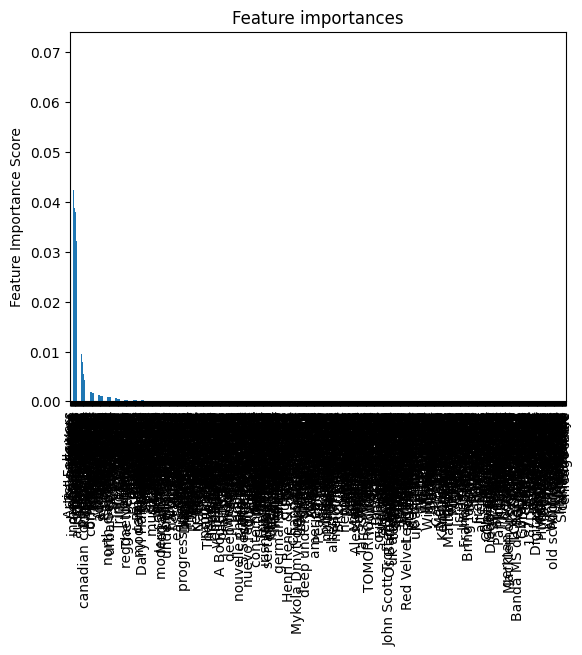

In [ ]:
importances = rf.feature_importances_
forest_importances = pd.Series( importances, index = X.columns )

plt.figure()
# forest_importances.plot.bar()
forest_importances.sort_values( ascending = False ).plot.bar()
plt.title("Feature importances")
plt.ylabel('Feature Importance Score') ;

In [ ]:
importance_sum = (forest_importances.sort_values( ascending = False ) * 100 ).cumsum()

In [ ]:
most_important = importance_sum[importance_sum<=95]

In [ ]:
df_features_selected = df_encoded[most_important.index]

In [ ]:
df_features_selected

,Artist Followers,Energy,Release Year,Loudness,Speechiness,Acousticness,Valence,Liveness,indie rock italiano,Danceability,...,philly rap,Myke Towers,Brenda Lee,trap latino,Post Malone,dance pop,k-pop,dfw rap,post-teen pop,Harry Styles
0,3377762,0.800,2017,-4.808,0.0504,0.12700,0.589,0.3590,1,0.714,...,0,0,0,0,0,0,0,0,0,0
1,2230022,0.764,2021,-5.484,0.0483,0.03830,0.478,0.1030,0,0.591,...,0,0,0,0,0,0,0,0,0,0
2,6266514,0.664,2021,-5.044,0.1540,0.33500,0.688,0.0849,0,0.563,...,0,0,0,0,0,0,0,0,0,0
3,83293380,0.897,2021,-3.712,0.0348,0.04690,0.591,0.3640,0,0.808,...,0,0,0,0,0,0,0,0,0,0
4,5473565,0.704,2021,-7.409,0.0615,0.02030,0.894,0.0501,0,0.736,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,27167675,0.700,2017,-6.021,0.0694,0.00261,0.608,0.1530,0,0.762,...,0,0,0,0,0,1,0,0,0,0
1552,15019109,0.870,2019,-3.123,0.0851,0.24000,0.714,0.3330,0,0.528,...,0,0,0,0,0,0,0,0,0,0
1553,22698747,0.523,2018,-4.333,0.0300,0.18400,0.394,0.1320,0,0.765,...,0,0,0,0,0,1,0,0,1,0
1554,208630,0.550,2019,-7.026,0.0587,0.24900,0.881,0.1820,0,0.832,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = df_features_selected
y = df_encoded['Streams']

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X,y)

RandomForestRegressor()

In [ ]:

cv_RMSE = cross_val_score(rf, X,y,scoring=RMSEf)


In [ ]:
f'{np.mean(cv_RMSE):_}'

'3_416_338.2945941957'

In [ ]:
Results['Random Forest Encoded '] = {'cv_RMSE':cv_RMSE,
                            'Mean':f'{np.mean(cv_RMSE):_.0f}',
                            'stdev': f'{np.std(cv_RMSE):_.0f}',
                            'Max':f'{min(cv_RMSE):_.0f}',
                            'Min':f'{max(cv_RMSE):_.0f}'
                            }

In [ ]:
Results

,Random Forest,Random Forest Encoded
cv_RMSE,"[6586919.23931691, 4112349.3360648113, 2877666...","[6532229.585004713, 4015143.232487831, 2800878..."
Mean,3_484_990,3_416_338
stdev,1_755_076,1_754_217
Max,1_655_925,1_604_409
Min,6_586_919,6_532_230


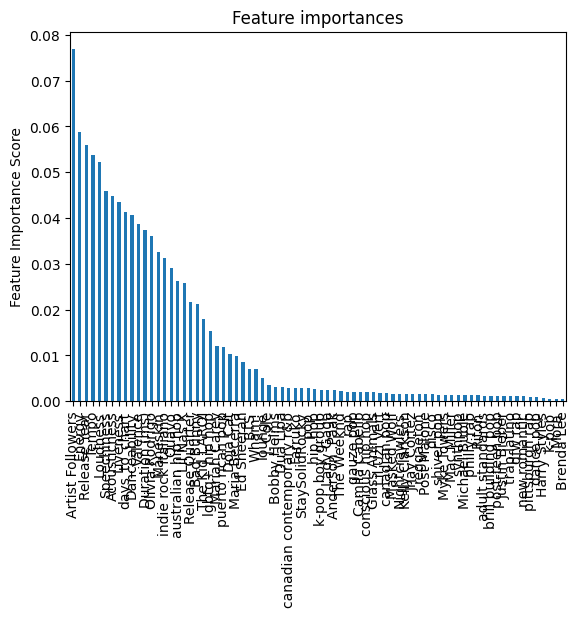

In [ ]:
importances = rf.feature_importances_
forest_importances = pd.Series( importances, index = X.columns )

plt.figure()
# forest_importances.plot.bar()
forest_importances.sort_values( ascending = False ).plot.bar()
plt.title("Feature importances")
plt.ylabel('Feature Importance Score') ;